In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/modified/New_data.txt
/kaggle/input/sunbasedatachurn/customer_churn_large_dataset.xlsx
/kaggle/input/customer-churn-predictor/__results__.html
/kaggle/input/customer-churn-predictor/__resultx__.html
/kaggle/input/customer-churn-predictor/__notebook__.ipynb
/kaggle/input/customer-churn-predictor/model.h5
/kaggle/input/customer-churn-predictor/__output__.json
/kaggle/input/customer-churn-predictor/custom.css
/kaggle/input/customer-churn-predictor/__results___files/__results___14_0.png
/kaggle/input/customer-churn-predictor/__results___files/__results___10_1.png
/kaggle/input/customer-churn-predictor/__results___files/__results___35_1.png


In [23]:
df = pd.read_excel('/kaggle/input/sunbasedatachurn/customer_churn_large_dataset.xlsx')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [25]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [26]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

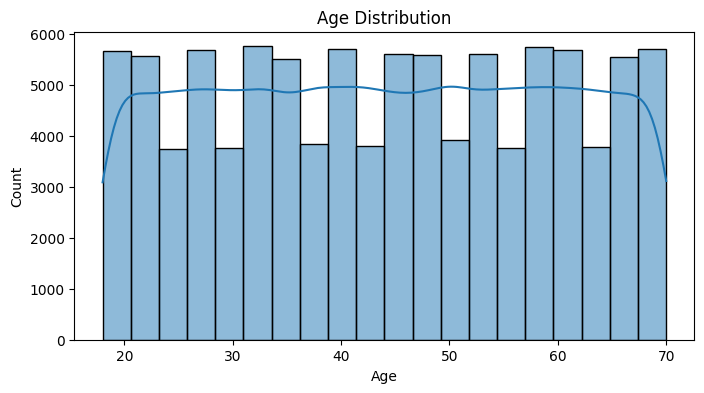

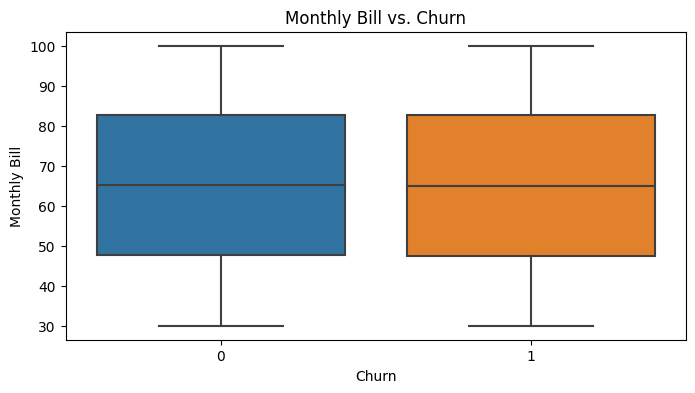

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# Box plot of Monthly_Bill by Churn
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='Monthly_Bill', data=df)
plt.xlabel('Churn')
plt.ylabel('Monthly Bill')
plt.title('Monthly Bill vs. Churn')
plt.show()

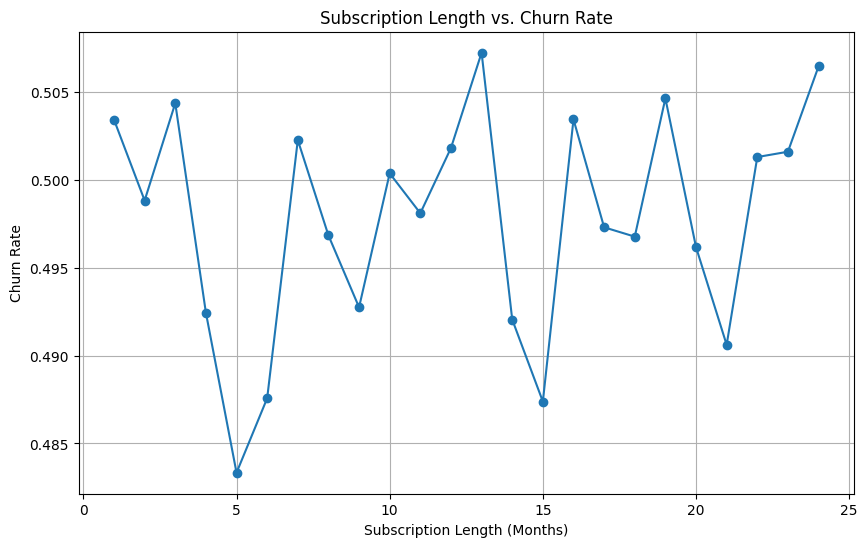

In [28]:
churn_rate_by_length = df.groupby('Subscription_Length_Months')['Churn'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(churn_rate_by_length['Subscription_Length_Months'], churn_rate_by_length['Churn'], marker='o', linestyle='-')
plt.title('Subscription Length vs. Churn Rate')
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Churn Rate')
plt.grid(True)

# Show the plot
plt.show()

In [29]:
df['Gender'].value_counts()
df['Location'].value_counts()

Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: count, dtype: int64

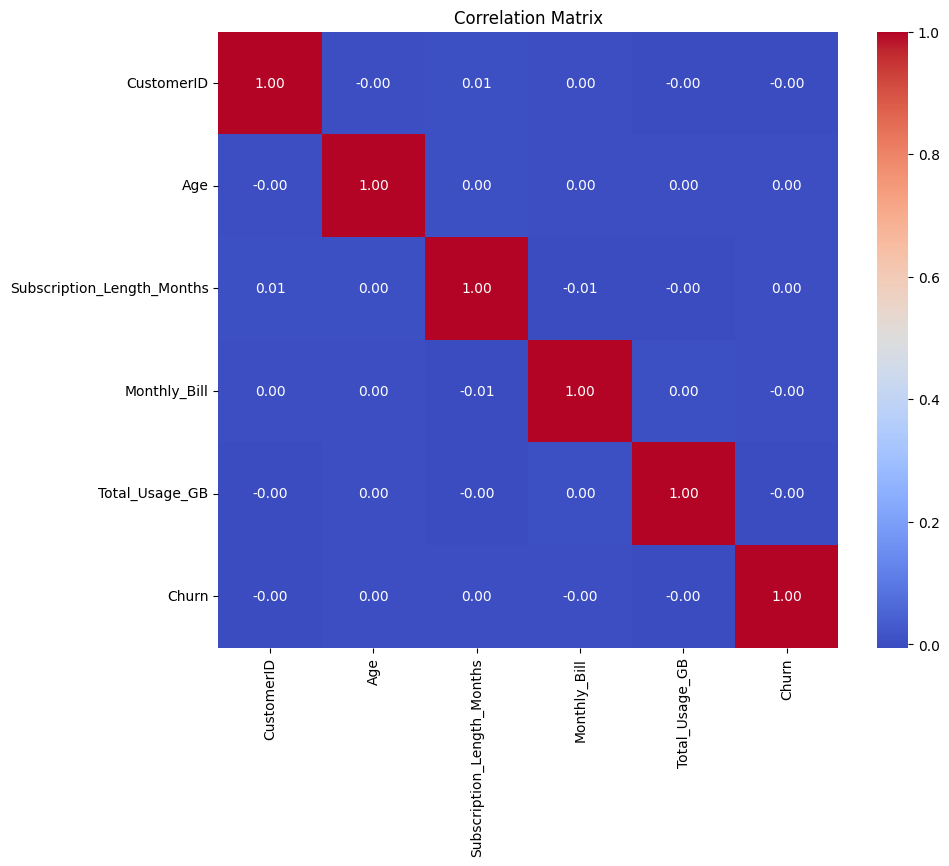

In [30]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [31]:
df = pd.get_dummies(df, columns=['Gender', 'Location'], drop_first=True)

In [32]:
from sklearn.model_selection import train_test_split

# Define your target variable (Churn) and features
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
75220,75221,Customer_75221,54,5,84.50,205,False,False,False,False,True
48955,48956,Customer_48956,28,24,82.06,239,True,False,False,False,True
44966,44967,Customer_44967,57,12,52.29,62,True,False,False,False,False
13568,13569,Customer_13569,19,19,32.57,173,True,True,False,False,False
92727,92728,Customer_92728,56,8,33.52,314,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6265,6266,Customer_6266,35,21,67.33,235,True,False,False,True,False
54886,54887,Customer_54887,56,13,85.40,347,True,False,False,False,False
76820,76821,Customer_76821,69,2,76.24,321,True,True,False,False,False
860,861,Customer_861,55,12,89.19,315,True,False,False,False,False


# Feature Engineering

In [36]:
bins = [0, 20, 30, 40, 50, np.inf]
labels = ['0-20', '20-30', '30-40', '40-50', '50+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [35]:
df['Average_Monthly_Usage_GB'] = df['Total_Usage_GB'] / df['Subscription_Length_Months']

In [37]:
df.head()

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Group,Average_Monthly_Usage_GB
0,1,Customer_1,63,17,73.36,236,0,True,False,True,False,False,50+,13.882353
1,2,Customer_2,62,1,48.76,172,0,False,False,False,False,True,50+,172.000000
2,3,Customer_3,24,5,85.47,460,0,False,False,True,False,False,20-30,92.000000
3,4,Customer_4,36,3,97.94,297,1,False,False,False,True,False,30-40,99.000000
4,5,Customer_5,46,19,58.14,266,0,False,False,False,True,False,40-50,14.000000


In [38]:
df = df.drop(['CustomerID','Age','Name'],axis  = 1)

In [39]:
df.head()

,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Group,Average_Monthly_Usage_GB
0,17,73.36,236,0,True,False,True,False,False,50+,13.882353
1,1,48.76,172,0,False,False,False,False,True,50+,172.000000
2,5,85.47,460,0,False,False,True,False,False,20-30,92.000000
3,3,97.94,297,1,False,False,False,True,False,30-40,99.000000
4,19,58.14,266,0,False,False,False,True,False,40-50,14.000000


# Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[[ 'Monthly_Bill', 'Total_Usage_GB','Average_Monthly_Usage_GB']])
df[[ 'Monthly_Bill', 'Total_Usage_GB','Average_Monthly_Usage_GB']] = scaled_features

In [45]:
df.head()

,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Average_Monthly_Usage_GB,Age_Group_0-20,Age_Group_20-30,Age_Group_30-40,Age_Group_40-50,Age_Group_50+
0,17,0.410606,-0.294289,0,True,False,True,False,False,-0.447926,False,False,False,False,True
1,1,-0.805374,-0.784852,0,False,False,False,False,True,1.955583,False,False,False,False,True
2,5,1.009204,1.422681,0,False,False,True,False,False,0.739522,False,True,False,False,False
3,3,1.625597,0.173279,1,False,False,False,True,False,0.845928,False,False,True,False,False
4,19,-0.341720,-0.064338,0,False,False,False,True,False,-0.446138,False,False,False,True,False


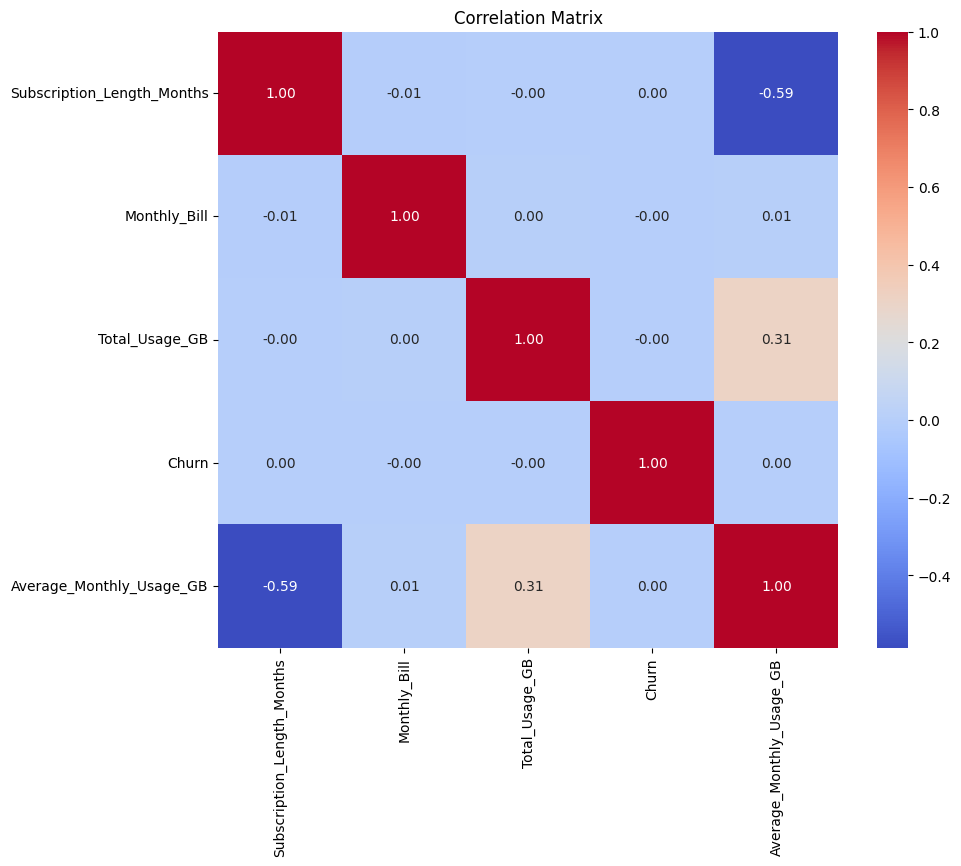

In [46]:
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split

selected_columns = [
    'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn',
    'Gender_Male', 'Location_Houston', 'Location_Los Angeles', 'Location_Miami', 'Location_New York',
    'Average_Monthly_Usage_GB', 'Age_Group_0-20', 'Age_Group_20-30', 'Age_Group_30-40', 'Age_Group_40-50', 'Age_Group_50+'
]

X = df[selected_columns].drop(columns=['Churn'])  # Features
y = df['Churn'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression for binary classification

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [52]:
logistic_regression = LogisticRegression(random_state=42)

logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Accuracy: 0.5023
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.62      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.50     20000



In [55]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print(f'F1 Score: {f1}')

F1 Score: 0.6631462852177401


# Why Logistic Regression is enadequate
Logistic regression is a linear classification method, making it inadequate for predicting variables with non-linear relationships with input features. It lacks the capacity to capture complex non-linear patterns, leading to underfitting and suboptimal predictions. To model non-linear relationships effectively, more complex algorithms like decision trees, neural networks, or support vector machines are typically preferred.

# Using an Neural Network to perform the classification

In [53]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='tanh')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5, batch_size=64, validation_split=0.95)

# Evaluate the model on the test data
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob >= 0.0).astype(int)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report for additional evaluation metrics
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)


Epoch 1/5
63/63 [==============================] - 11s 45ms/step - loss: 1.5734 - accuracy: 0.5080 - val_loss: 0.7032 - val_accuracy: 0.5020
Epoch 2/5
63/63 [==============================] - 6s 89ms/step - loss: 0.6944 - accuracy: 0.5357 - val_loss: 0.7021 - val_accuracy: 0.5006
Epoch 3/5
63/63 [==============================] - 3s 42ms/step - loss: 0.6875 - accuracy: 0.5485 - val_loss: 0.7071 - val_accuracy: 0.5013
Epoch 4/5
63/63 [==============================] - 3s 46ms/step - loss: 0.6835 - accuracy: 0.5635 - val_loss: 0.7046 - val_accuracy: 0.5005
Epoch 5/5
625/625 [==============================] - 2s 2ms/step
Accuracy: 0.49605
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10079
           1       0.50      1.00      0.66      9921

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Using Gradient Boosting 

In [56]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f'Accuracy (XGBoost): {accuracy_xgb}')
print(f'F1 Score (XGBoost): {f1_xgb}')

report_xgb = classification_report(y_test, y_pred_xgb)
print('Classification Report (XGBoost):\n', report_xgb)

Accuracy (XGBoost): 0.50495
F1 Score (XGBoost): 0.4914479428835585
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.51      0.53      0.52     10079
           1       0.50      0.48      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



# Using Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f'Accuracy (Random Forest): {accuracy_rf}')
print(f'F1 Score (Random Forest): {f1_rf}')

report_rf = classification_report(y_test, y_pred_rf)
print('Classification Report (Random Forest):\n', report_rf)

Accuracy (Random Forest): 0.49995
F1 Score (Random Forest): 0.4905506596709286
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.50      0.51      0.51     10079
           1       0.50      0.49      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [58]:
report_xgb = classification_report(y_test, y_pred_xgb)
print('Classification Report (XGBoost):\n', report_xgb)

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.51      0.53      0.52     10079
           1       0.50      0.48      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



# Using KNN 

In [59]:
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k_value = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)
]accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Accuracy: 0.4963
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     10079
           1       0.49      0.49      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

